<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to the Regression with Neural Networks in TensorFlow
There are many definations for a regression problem but in pur cases, we're going to simplfy it: predicting a numerical variables based on some other cobination of variable, even shorter.....predicting a number

In [254]:
import tensorflow as tf
print(tf.__version__)

2.18.0


##Creating some data to view and fit

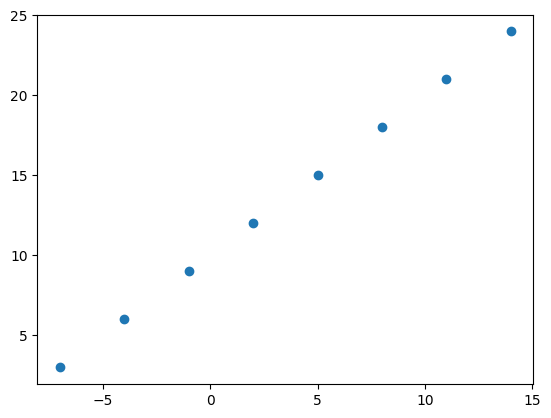

In [255]:
import numpy as np
import matplotlib.pyplot as plt
#creating features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0, 8.0, 11.0, 14.0])
#creating labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#visulaize it
plt.scatter(x,y)


In [256]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [257]:
# create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([9397000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9397000], dtype=int32)>)

In [258]:
input_shape=x.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [259]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [260]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

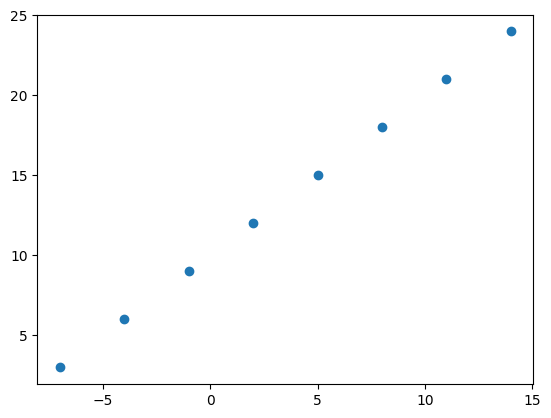

In [261]:
plt.scatter(x,y)

In [262]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

##Steps in Modeling TensorFlow
1.**Creating a Model**: define the input & ouput layers, as well as the hidden layres of a deep learning model.

2.**Compiling a model**: define the loss function(in other words, the function which tells our model how wrong it is)and the optimizer( tells our model how to improve the patterns its learning) and evaluation metrics
(What we can use to interpret the performance of our model).

3.**Fitting a model**: letting the model try to find patterns between x & y(features and labels)

In [263]:
#set ramdom seed
tf.random.set_seed(42)

#1.Create  a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - loss: 9.4922 - mae: 9.4922
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 9.3597 - mae: 9.3597
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.2272 - mae: 9.2272
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.0947 - mae: 9.0947
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.9622 - mae: 8.9622


In [264]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[22.491413]], dtype=float32)

##Improving Model
We can inprove the model by altering the steps we took to create a mode.

1.**Creating a mode**: here we might add more layres, increaes the number of hidden unite(all called neurons) within each of the hidden layers, change the activation function of each layer

2.**Compiling a model**:Here we might change the optimizatioin function or perhaps the learning rate of optimization functon.

3**Fitting**: here we might fit the model for more epochs(leave it training for longer) or on more data(given the model more examples to learn from)

###Using SSD()

In [265]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 53s 53s/step - loss: 14.3486 - mae: 14.3486
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.9099 - mae: 13.9099
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 13.5245 - mae: 13.5245
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.1914 - mae: 13.1914
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.8640 - mae: 12.8640
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 12.5220 - mae: 12.5220
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.1408 - mae: 12.1408
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.7016 - mae: 11.7016
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 11.1911 - mae: 11.1911
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 10.5714 - mae: 10.5714
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 9.8129 - mae: 9.8129
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 8.8422 - mae: 8.8422
Epoch 13/100
1/1 ━━━━━━━━━━

In [266]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred, y_pred+10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


(array([[32.951145]], dtype=float32), array([[42.951145]], dtype=float32))

###Using Adam(Adam(learning_rate=0.0001)

In [267]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13.5490 - mae: 13.5490
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 13.5273 - mae: 13.5273
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 13.5079 - mae: 13.5079
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.4879 - mae: 13.4879
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 13.4680 - mae: 13.4680
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.4480 - mae: 13.4480
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.4278 - mae: 13.4278
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.4082 - mae: 13.4082
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.3885 - mae: 13.3885
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.3689 - mae: 13.3689
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.3492 - mae: 13.3492
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.3297 - mae: 13.3297
Epoch 13/100
1/1 ━━━━━━━━

In [268]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[16.740433]], dtype=float32)

In [269]:
y_pred+10

array([[26.740433]], dtype=float32)

In [270]:
x.numpy(),y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

###Let's see if we can make another to improve our model

In [271]:
#1. Create tthe model(this time eith an extra hidden layers with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - loss: 13.1755 - mae: 13.1755
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.6507 - mae: 12.6507
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.1320 - mae: 12.1320
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.6061 - mae: 11.6061
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.0691 - mae: 11.0691
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 10.5289 - mae: 10.5289
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.9690 - mae: 9.9690
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 9.3817 - mae: 9.3817
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 8.7950 - mae: 8.7950
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.1961 - mae: 8.1961
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.5585 - mae: 7.5585
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.8736 - mae: 6.8736
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [272]:
x.numpy(),y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [273]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[31.329226]], dtype=float32)

###48. Evaluating a TensorFlow model part 1 ("visualise, visualise, visualise")

#Evaluating a model
In pratice, a typical workflow you'll go through when building neural networks is:
```
Build a model->fit it -> evaluate it-> tweek model -> fit it -> evaluate it -> tweek a model -> fit it -> evaluate it...



When it somes to evaluating.. there are 3 words you should memorize:
>"Visualize, visualize, visualize"

It's a good idea to visualize:

*The data- what data are we woeking with? What does it looks like?

*The model itself- what does our model look like?

*The training of a model- how does a model perform while it learning?

*The predictions of a model- how do the prediction of a model line up aagainst the ground truth(the original labels)


In [274]:
#Make a big dataset
x=tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [275]:
#make labels for the dataset
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

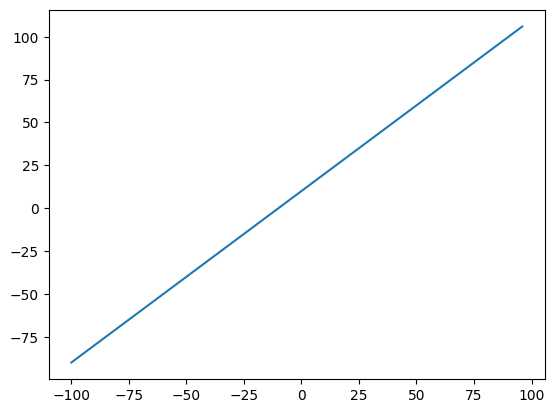

In [276]:
#visualize the data
import matplotlib.pyplot as plt
plt.plot(x,y)

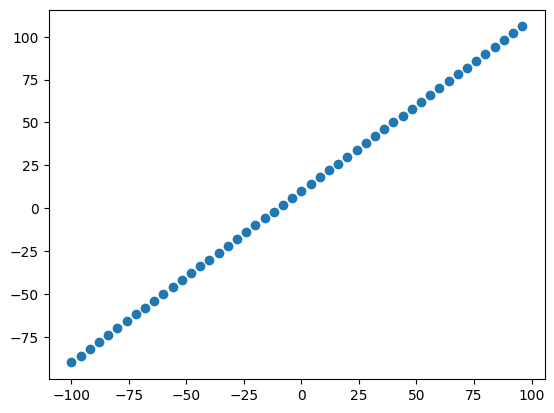

In [277]:
plt.scatter(x,y)

###The 3 set...
***Training set*** -the model learns from the  data, which is typicallly 70-80% of the total data you have available.

***Validation set*** - the model gets turned on this data, which is typically 10-15% of the data available.

***Test set*** - The model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data vailabe


In [278]:
x_train=np.array(x[:40])# first 40 are training samples(80% of the total data)
y_train=np.array(y[:40])

x_test=x[40:]# last 10 are testing samples(20% of the total data)
y_test=y[40:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#Visualising the data
Now we have got pur data in tarining and test sets... let's visulaize it again!

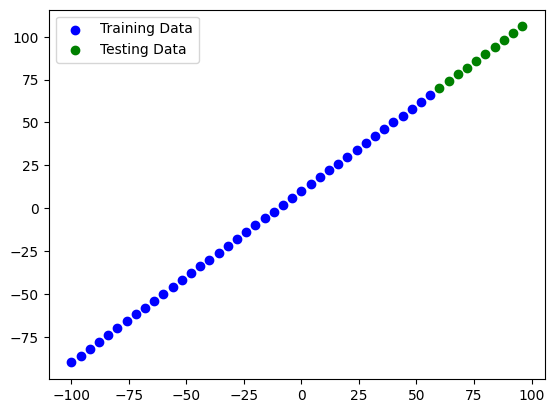

In [279]:
# plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training Data")

#plot testing data in green
plt.scatter(x_test, y_test, c="g", label="Testing Data")

#showing the legends
plt.legend();


In [280]:
#lets create a model which builds autoatically by defining the input_shape agguments

tf.random.set_seed(42)

#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"), # 1 denotes the no. of the parameter(optional you can choose multiple no. of params)
    tf.keras.layers.Dense(1, name="output_layes")
], name="mode_1")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [281]:
model.summary()

Model: "mode_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layes (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [282]:
#3.Fit a model
model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 53.2154 - mae: 53.2154 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 25.7583 - mae: 25.7583
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 23.9934 - mae: 23.9934
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 20.0188 - mae: 20.0188 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 18.0282 - mae: 18.0282
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 17.1984 - mae: 17.1984
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.8650 - mae: 11.8650
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.7322 - mae: 14.7322 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.5492 - mae: 15.5492
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.6356 - mae: 11.6356
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.6011 - mae: 14.6011
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.6481 - mae: 15.6481
Epoch 13/100
2/2 ━━━━━

In [283]:
#get a summaru of a model
model.summary()

Model: "mode_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layes (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

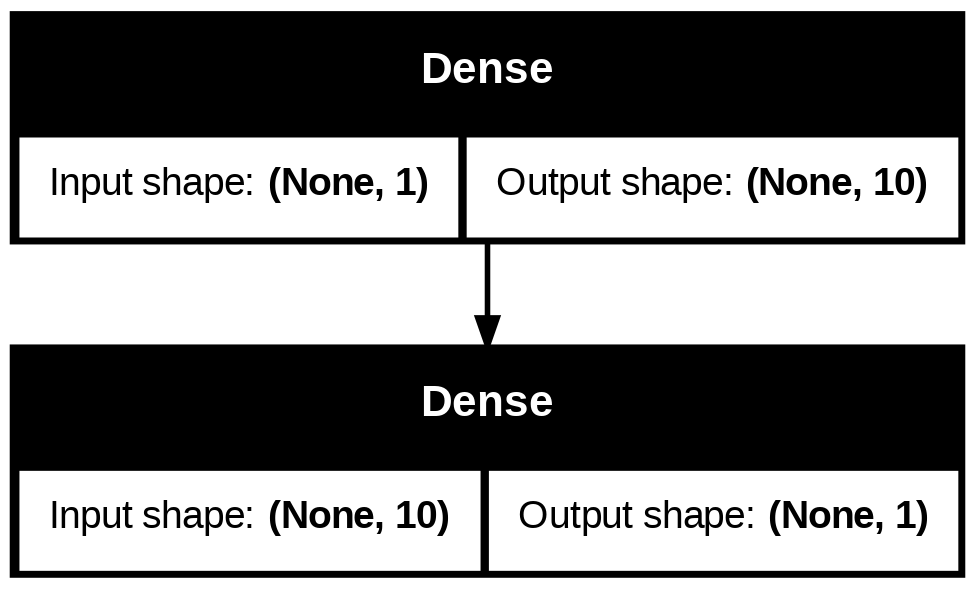

In [284]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

###Visualize our model's Predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test oy y_true versus y_pred(ground truth versus you model's predictios)

In [285]:
#3.Fit a model
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=100, verbose=0)

In [293]:
#Make some predictions
y_pred=model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[55.39371 ],
       [58.21572 ],
       [61.037724],
       [63.859737],
       [66.68175 ],
       [69.50375 ],
       [72.32576 ],
       [75.14777 ],
       [77.96978 ],
       [80.791794]], dtype=float32)

In [287]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [294]:
#let's create a plotting functions
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10,7))
#plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

#plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

#plot the predictions in red
  plt.scatter(test_data,  predictions, c="r", label=" Predictions")
#dhow the legends
  plt.legend()

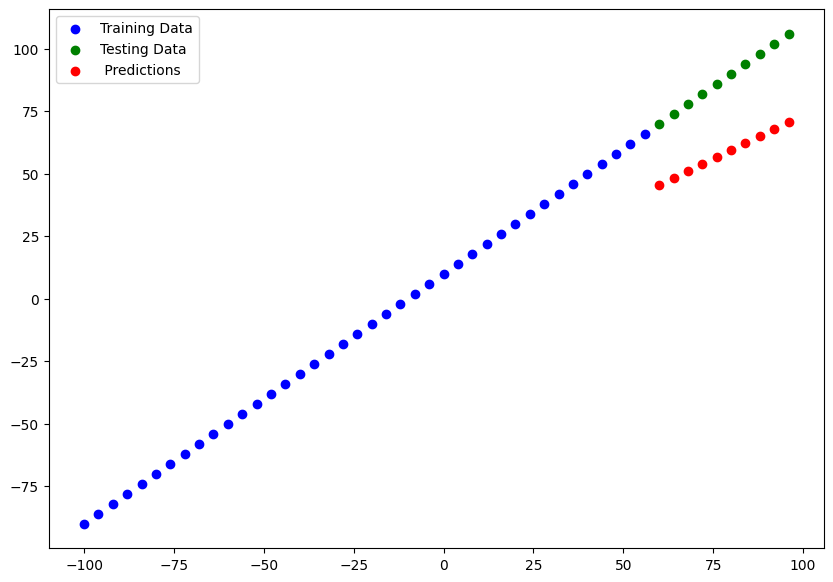

In [295]:
plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred)